✅ Data loaded successfully!
Shape: (15509, 10)

Columns:
 ['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']

Sample Data:



,name,year,duration,genre,rating,votes,director,actor_1,actor_2,actor_3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


🎯 Target column detected: rating
✅ Dropped missing values in target. Remaining rows: 7919

Categorical columns: ['duration', 'genre', 'votes', 'director', 'actor_1', 'actor_2', 'actor_3']
Numeric columns: ['year']
✅ Train size: (6335, 8), Test size: (1584, 8)

🔹 Training Linear Regression model...
🔹 Training Random Forest model...

📊 Linear Regression Performance:
R² Score: -42.916
MAE: 6.82
RMSE: 9.036

📊 Random Forest Performance:
R² Score: 0.288
MAE: 0.879
RMSE: 1.15


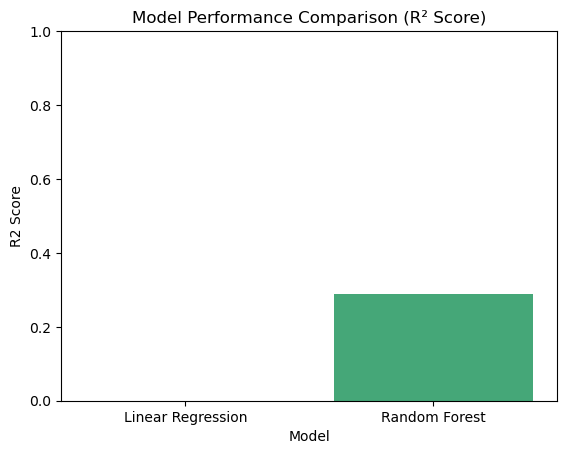

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

try:
    df = pd.read_csv("IMDb Movies India.csv", encoding="utf-8", low_memory=False)
except UnicodeDecodeError:
    df = pd.read_csv("IMDb Movies India.csv", encoding="ISO-8859-1", low_memory=False)

print("✅ Data loaded successfully!")
print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())

df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]

print("\nSample Data:\n")
display(df.head())

target_col = None
possible_targets = ["rating", "imdb_rating", "score", "imdb_score"]

for col in df.columns:
    if col.lower() in possible_targets:
        target_col = col
        break

if target_col is None:
    raise ValueError("⚠️ Could not find a rating column. Expected one of: rating, imdb_rating, score, imdb_score")

print(f"🎯 Target column detected: {target_col}")

df = df.dropna(subset=[target_col])
print(f"✅ Dropped missing values in target. Remaining rows: {len(df)}")

if 'year' in df.columns:
    df['year'] = df['year'].astype(str).str.extract(r'(\d{4})')
    df['year'] = pd.to_numeric(df['year'], errors='coerce')

drop_cols = [col for col in ['name'] if col in df.columns]
df = df.drop(columns=drop_cols, errors='ignore')

X = df.drop(columns=[target_col])
y = df[target_col]

cat_cols = X.select_dtypes(include=['object']).columns.tolist()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("\nCategorical columns:", cat_cols)
print("Numeric columns:", num_cols)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"✅ Train size: {X_train.shape}, Test size: {X_test.shape}")

numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("encoder", OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ]
)

lr_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

print("\n🔹 Training Linear Regression model...")
lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)

rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(n_estimators=200, random_state=42))
])

print("🔹 Training Random Forest model...")
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

def evaluate_model(y_true, y_pred, model_name):
    print(f"\n📊 {model_name} Performance:")
    print("R² Score:", round(r2_score(y_true, y_pred), 3))
    print("MAE:", round(mean_absolute_error(y_true, y_pred), 3))
    print("RMSE:", round(np.sqrt(mean_squared_error(y_true, y_pred)), 3))

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")

results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "R2 Score": [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_rf)
    ]
})

sns.barplot(data=results, x="Model", y="R2 Score", palette="viridis")
plt.title("Model Perform
